<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Logistic_regression(TASK_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression** is a statistical method used for binary classification tasks, where the target variable has two possible outcomes.
Logistic Regression is primarily used for binary classification tasks, where the target variable
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.



y can take on two possible values, typically represented as

0 and
1


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

1. **Binary Logistic Regression**
In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. **Multinomial Logistic Regression**
In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. **Ordinal Logistic Regression**
In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.
Sigmoid Function:
Logistic Regression uses the sigmoid function (also known as the logistic function) to map the output of the linear combination of input features to a probability score between

0 and
1


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/weatherAUS.csv.zip')

In [ ]:
print(df.head())  # Display the first few rows

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [ ]:
print(df.info())  # Display information about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Step 1: Identify Null Values
null_values = df.isnull().sum()
# Drop rows with any null values
df.dropna(inplace=True)
# After dropping null values, you may want to reset the index:
df.reset_index(drop=True, inplace=True)


In [ ]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
print(df.describe())  # Display summary statistics

             MinTemp        MaxTemp       Rainfall    Evaporation  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean       12.413917      23.474808       2.375661       5.551665   
std         6.366792       7.205898       8.528039       3.245612   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.800000      18.100000       0.000000       4.200000   
50%        12.200000      23.000000       0.000000       5.468232   
75%        17.000000      28.600000       0.800000       5.600000   
max        33.900000      48.100000     367.600000      86.200000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  123710.000000  123710.000000  123710.000000  123710.000000   
mean        7.669315      40.685280      15.011689      19.174578   
std         2.782271      13.388636       8.307285       8.571039   
min         0.000000       7.000000       2.000000       2.000000   
25%         7.611178      31.0000

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

**Data Analysis**

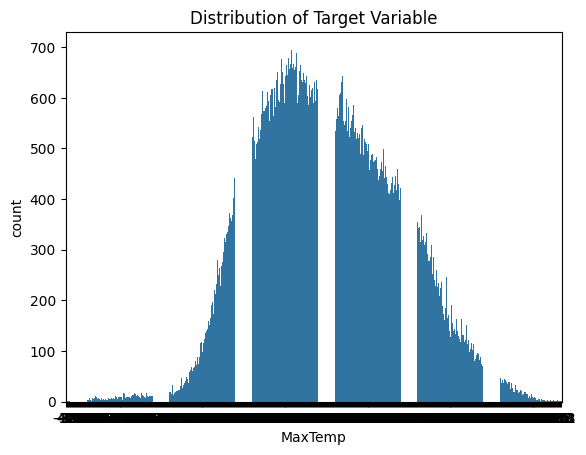

In [ ]:
# Visualizations (customize as per your dataset)
sns.countplot(x='MaxTemp', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
px.histogram(data_frame=df, x='Location', color='RainTomorrow',color_discrete_sequence=['#05445E','#75E6DA'])

**Data Preprocessing**

In [ ]:
# Assuming 'RainTomorrow' is the target variable
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Assuming 'X_train' and 'X_test' have categorical columns
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Apply standard scaling after one-hot encoding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (98968, 113)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8533667448064021


The ROC curve provides a visual representation of how well a binary classification model discriminates between the positive and negative classes across various decision thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values.

Threshold Selection: The ROC curve helps in selecting an appropriate classification threshold based on the specific requirements of the application

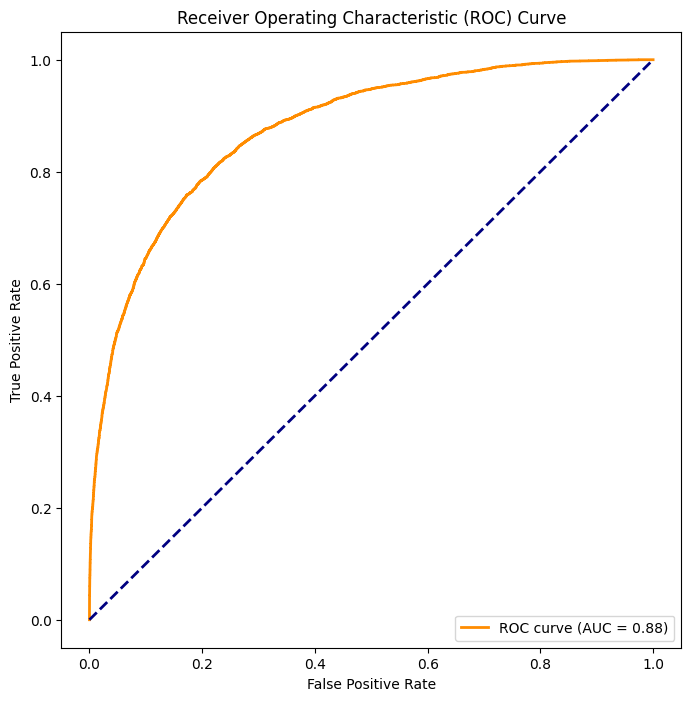

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_probabilities = model.predict_proba(X_test)[:, 1]

# Convert string labels to numerical values (0 and 1)
y_test_binary = (y_test == 'Yes').astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probabilities)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[18235  1049]
 [ 2579  2879]]


In [ ]:
cr = classification_report(y_test,predictions)
print("Classification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.95      0.91     19284
         Yes       0.73      0.53      0.61      5458

    accuracy                           0.85     24742
   macro avg       0.80      0.74      0.76     24742
weighted avg       0.84      0.85      0.84     24742



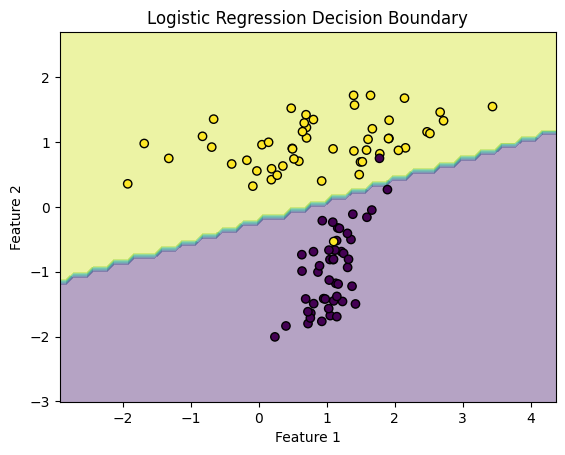

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate some synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
